# Codigos

Calculando para método: Riemann Esquerda
  n=10: resultado=-1.0819816905, erro=1.18e-01, tempo=2.87e-03s
  n=50: resultado=-1.1761890446, erro=2.35e-02, tempo=9.43e-05s
  n=100: resultado=-1.1879424684, erro=1.17e-02, tempo=1.95e-04s
  n=500: resultado=-1.1973416084, erro=2.35e-03, tempo=2.20e-04s
  n=1000: resultado=-1.1985162759, erro=1.17e-03, tempo=1.35e-04s
  n=5000: resultado=-1.1994559740, erro=2.35e-04, tempo=8.16e-04s
Calculando para método: Riemann Direita
  n=10: resultado=-1.2139445923, erro=1.43e-02, tempo=4.58e-05s
  n=50: resultado=-1.2006627322, erro=9.72e-04, tempo=2.58e-05s
  n=100: resultado=-1.2000593459, erro=3.68e-04, tempo=2.29e-05s
  n=500: resultado=-1.1997457889, erro=5.49e-05, tempo=3.33e-05s
  n=1000: resultado=-1.1997171665, erro=2.63e-05, tempo=3.84e-05s
  n=5000: resultado=-1.1996959601, erro=5.07e-06, tempo=1.36e-04s
Calculando para método: Riemann Ponto Médio
  n=10: resultado=-1.1998158704, erro=1.25e-04, tempo=5.22e-05s
  n=50: resultado=-1.1996958922

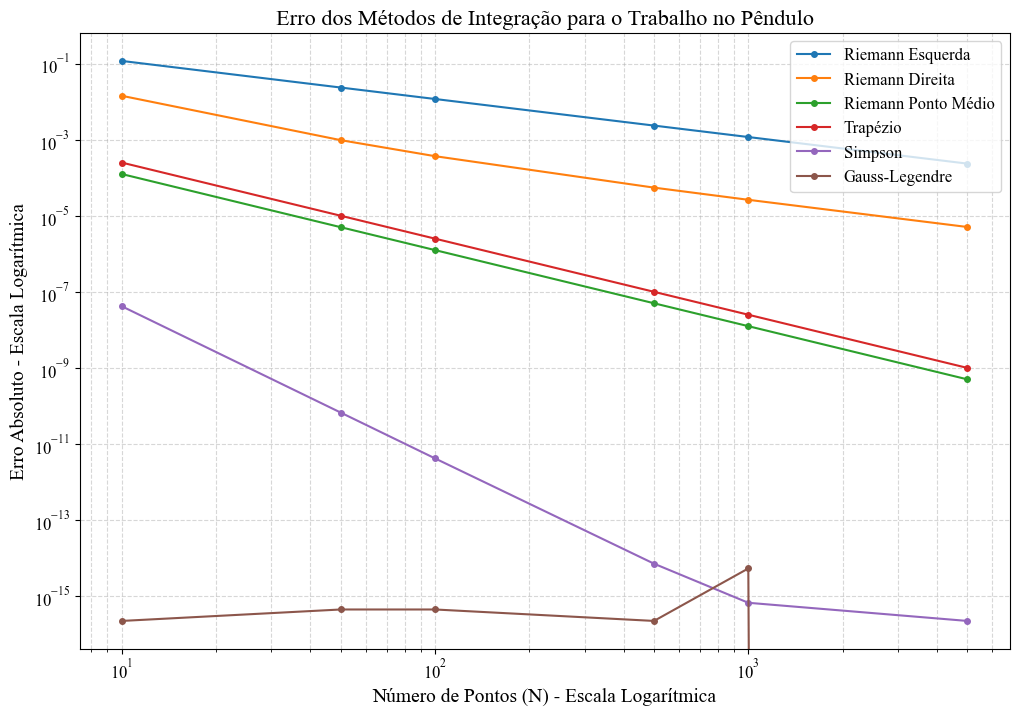

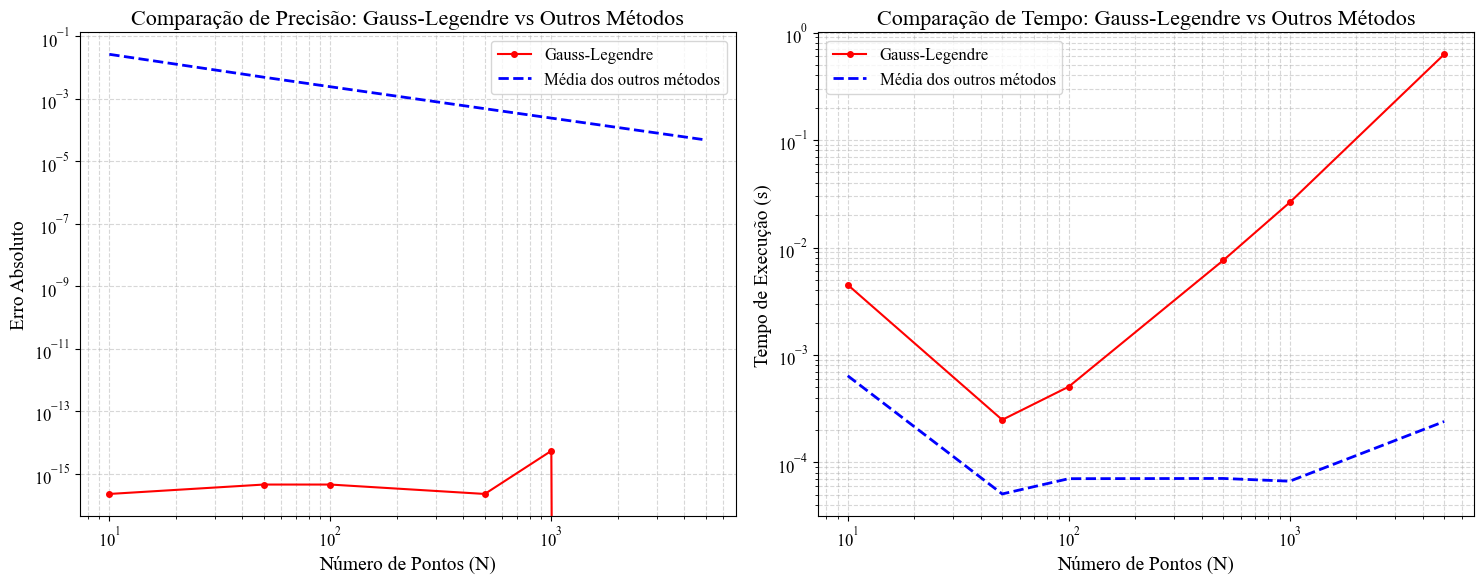

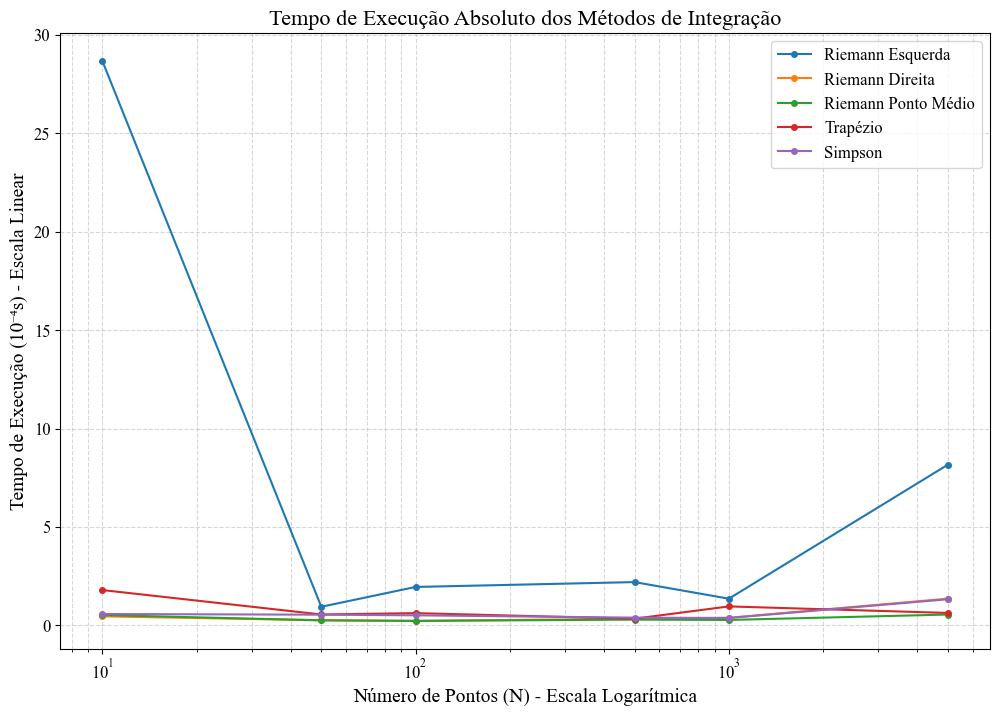


RESULTADOS FINAIS (maior n)
Método                    Resultado       Erro            Tempo (s)      
--------------------------------------------------------------------------------
Riemann Esquerda          -1.1994559740   2.35e-04        8.16e+00       
Riemann Direita           -1.1996959601   5.07e-06        1.36e+00       
Riemann Ponto Médio       -1.1996908940   5.00e-10        5.49e-01       
Trapézio                  -1.1996908925   1.00e-09        6.30e-01       
Simpson                   -1.1996908935   2.22e-16        1.33e+00       
Gauss-Legendre            -1.1996908935   0.00e+00        6.28e-01       
Valor de Referência       -1.1996908935   -               -              


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import integrate
from scipy.special import roots_legendre

# Configurações de plotagem
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'figure.figsize': (10, 6),
    'figure.dpi': 100
})

# Parâmetros físicos reais para um pêndulo
m = 1.0      # massa de 1 kg
g = 9.8      # aceleração gravitacional (m/s²)
L = 1.0      # comprimento de 1 m
mgL = m * g * L  # Parâmetro combinado

# Função a ser integrada: força tangencial F(θ) = -mgL sin(θ)
def forca_tangencial(theta):
    return -mgL * np.sin(theta)

# Valor de referência (solução analítica)
# Trabalho = ∫ F(θ) dθ = mgL (cos(θ1) - cos(θ0))
theta0 = 0.0
theta1 = 0.5  # 0.5 radianos (≈28.6 graus)
valor_referencial = mgL * (np.cos(theta1) - np.cos(theta0))

# Usaremos apenas float64 para maior precisão
dtype = np.float64

# Métodos de integração
def riemann_esquerda(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n, endpoint=False, dtype=dtype)
    return np.sum(f(x)) * dx

def riemann_direita(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a + dx, b, n, endpoint=False, dtype=dtype)
    return np.sum(f(x)) * dx

def riemann_ponto_medio(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a + dx/2, b - dx/2, n, dtype=dtype)
    return np.sum(f(x)) * dx

def trapezio(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n+1, dtype=dtype)
    return dx/2 * (f(a) + f(b) + 2 * np.sum(f(x[1:-1])))

def simpson(f, a, b, n):
    if n % 2 != 0:
        n += 1  # Garante que n é par
    h = (b - a) / n
    x = np.linspace(a, b, n+1, dtype=dtype)
    y = f(x)
    return h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))

def gauss_legendre(f, a, b, n):
    # Obter nós e pesos de Gauss-Legendre
    x, w = roots_legendre(n)
    # Mapear de [-1, 1] para [a, b]
    x_mapped = 0.5*(b - a)*x + 0.5*(b + a)
    return 0.5*(b - a) * np.sum(w * f(x_mapped))

# Lista de métodos a serem comparados
metodos = {
    'Riemann Esquerda': riemann_esquerda,
    'Riemann Direita': riemann_direita,
    'Riemann Ponto Médio': riemann_ponto_medio,
    'Trapézio': trapezio,
    'Simpson': simpson,
    'Gauss-Legendre': gauss_legendre
}

# Valores de n (número de pontos) para testar
n_valores = [10, 50, 100, 500, 1000, 5000]

# Calcular resultados e erros para cada método
resultados = {nome: [] for nome in metodos}
erros = {nome: [] for nome in metodos}
tempos = {nome: [] for nome in metodos}

for nome, metodo in metodos.items():
    print(f"Calculando para método: {nome}")
    
    for n in n_valores:
        inicio = time.perf_counter()  # Usar perf_counter para maior precisão
        resultado = metodo(forca_tangencial, theta0, theta1, n)
        fim = time.perf_counter()
        
        tempo_execucao = fim - inicio
        # Garantir que o tempo seja pelo menos 1 microssegundo para evitar divisão por zero
        tempo_execucao = max(tempo_execucao, 1e-6)
        
        erro = abs(resultado - valor_referencial)
        
        resultados[nome].append(resultado)
        erros[nome].append(erro)
        tempos[nome].append(tempo_execucao)
        
        print(f"  n={n}: resultado={resultado:.10f}, erro={erro:.2e}, tempo={tempo_execucao:.2e}s")

# Gráfico 1: Erro vs Número de Pontos (escala logarítmica)
plt.figure(figsize=(12, 8))
for nome in metodos:
    plt.loglog(n_valores, erros[nome], 'o-', label=nome, markersize=4)

plt.xlabel('Número de Pontos (N) - Escala Logarítmica')
plt.ylabel('Erro Absoluto - Escala Logarítmica')
plt.title('Erro dos Métodos de Integração para o Trabalho no Pêndulo')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.savefig('erro_integracao_pendulo.png', dpi=300, bbox_inches='tight')
plt.show()

# Gráfico 2: Comparação entre Gauss-Legendre e a média dos outros métodos
# Calcular a média dos erros e tempos dos outros métodos (excluindo Gauss-Legendre)
metodos_sem_gauss = {k: v for k, v in metodos.items() if k != 'Gauss-Legendre'}

erros_media = []
tempos_media = []

for i in range(len(n_valores)):
    erros_n = np.mean([erros[nome][i] for nome in metodos_sem_gauss])
    tempos_n = np.mean([tempos[nome][i] for nome in metodos_sem_gauss])
    erros_media.append(erros_n)
    tempos_media.append(tempos_n)

# Criar subplots para comparar erro e tempo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Comparação de erro
ax1.loglog(n_valores, erros['Gauss-Legendre'], 'ro-', label='Gauss-Legendre', markersize=4)
ax1.loglog(n_valores, erros_media, 'b--', label='Média dos outros métodos', linewidth=2)
ax1.set_xlabel('Número de Pontos (N)')
ax1.set_ylabel('Erro Absoluto')
ax1.set_title('Comparação de Precisão: Gauss-Legendre vs Outros Métodos')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

# Subplot 2: Comparação de tempo de execução
ax2.loglog(n_valores, tempos['Gauss-Legendre'], 'ro-', label='Gauss-Legendre', markersize=4)
ax2.loglog(n_valores, tempos_media, 'b--', label='Média dos outros métodos', linewidth=2)
ax2.set_xlabel('Número de Pontos (N)')
ax2.set_ylabel('Tempo de Execução (s)')
ax2.set_title('Comparação de Tempo: Gauss-Legendre vs Outros Métodos')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('comparacao_gauss_legendre.png', dpi=300, bbox_inches='tight')
plt.show()

# Ajustar a escala de tempo do 3 gráfico
for nome in metodos_sem_gauss:
    tempos[nome] = [tempo * 1e4 for tempo in tempos[nome]]

# Gráfico 3: Tempos absolutos dos métodos (sem Gauss-Legendre)
plt.figure(figsize=(12, 8))
for nome in metodos_sem_gauss:
    plt.semilogx(n_valores, tempos[nome], 'o-', label=nome, markersize=4)

plt.xlabel('Número de Pontos (N) - Escala Logarítmica')
plt.ylabel('Tempo de Execução (10⁻⁴s) - Escala Linear')
plt.title('Tempo de Execução Absoluto dos Métodos de Integração')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.savefig('tempo_absoluto_sem_gauss.png', dpi=300, bbox_inches='tight')
plt.show()

# Tabela de resultados para o maior n
print("\n" + "="*80)
print("RESULTADOS FINAIS (maior n)")
print("="*80)
print(f"{'Método':<25} {'Resultado':<15} {'Erro':<15} {'Tempo (s)':<15}")
print("-"*80)

for nome in metodos:
    idx = len(n_valores) - 1  # Último valor de n
    resultado = resultados[nome][idx]
    erro = erros[nome][idx]
    tempo = tempos[nome][idx]
    
    print(f"{nome:<25} {resultado:<15.10f} {erro:<15.2e} {tempo:<15.2e}")

print(f"{'Valor de Referência':<25} {valor_referencial:<15.10f} {'-':<15} {'-':<15}")
print("="*80)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy import integrate
from scipy.special import roots_legendre

def analise_integracao_pendulo():
    """
    Função principal que executa toda a análise numérica para o problema do pêndulo
    Retorna um dicionário com todos os dados necessários para o artigo
    """
    
    # Configurações de plotagem
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'legend.fontsize': 12,
        'figure.titlesize': 18,
        'figure.figsize': (10, 6),
        'figure.dpi': 100
    })

    # Parâmetros físicos reais para um pêndulo
    m = 1.0      # massa de 1 kg
    g = 9.8      # aceleração gravitacional (m/s²)
    L = 1.0      # comprimento de 1 m
    mgL = m * g * L  # Parâmetro combinado

    # Função a ser integrada: força tangencial F(θ) = -mgL sin(θ)
    def forca_tangencial(theta):
        return -mgL * np.sin(theta)

    # Valor de referência (solução analítica)
    # Trabalho = ∫ F(θ) dθ = mgL (cos(θ1) - cos(θ0))
    theta0 = 0.0
    theta1 = 0.5  # 0.5 radianos (≈28.6 graus)
    valor_referencial = mgL * (np.cos(theta1) - np.cos(theta0))

    # Usaremos apenas float64 para maior precisão
    dtype = np.float64

    # Métodos de integração
    def riemann_esquerda(f, a, b, n):
        dx = (b - a) / n
        x = np.linspace(a, b, n, endpoint=False, dtype=dtype)
        return np.sum(f(x)) * dx

    def riemann_direita(f, a, b, n):
        dx = (b - a) / n
        x = np.linspace(a + dx, b, n, endpoint=False, dtype=dtype)
        return np.sum(f(x)) * dx

    def riemann_ponto_medio(f, a, b, n):
        dx = (b - a) / n
        x = np.linspace(a + dx/2, b - dx/2, n, dtype=dtype)
        return np.sum(f(x)) * dx

    def trapezio(f, a, b, n):
        dx = (b - a) / n
        x = np.linspace(a, b, n+1, dtype=dtype)
        return dx/2 * (f(a) + f(b) + 2 * np.sum(f(x[1:-1])))

    def simpson(f, a, b, n):
        if n % 2 != 0:
            n += 1  # Garante que n é par
        h = (b - a) / n
        x = np.linspace(a, b, n+1, dtype=dtype)
        y = f(x)
        return h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))

    def gauss_legendre(f, a, b, n):
        # Obter nós e pesos de Gauss-Legendre
        x, w = roots_legendre(n)
        # Mapear de [-1, 1] para [a, b]
        x_mapped = 0.5*(b - a)*x + 0.5*(b + a)
        return 0.5*(b - a) * np.sum(w * f(x_mapped))

    # Lista de métodos a serem comparados
    metodos = {
        'Riemann Esquerda': riemann_esquerda,
        'Riemann Direita': riemann_direita,
        'Riemann Ponto Médio': riemann_ponto_medio,
        'Trapézio': trapezio,
        'Simpson': simpson,
        'Gauss-Legendre': gauss_legendre
    }

    # Valores de n (número de pontos) para testar
    n_valores = [10, 50, 100, 500, 1000, 5000]

    # Calcular resultados e erros para cada método
    resultados = {nome: [] for nome in metodos}
    erros = {nome: [] for nome in metodos}
    tempos = {nome: [] for nome in metodos}

    for nome, metodo in metodos.items():
        print(f"Calculando para método: {nome}")
        
        for n in n_valores:
            inicio = time.perf_counter()
            resultado = metodo(forca_tangencial, theta0, theta1, n)
            fim = time.perf_counter()
            
            tempo_execucao = fim - inicio
            tempo_execucao = max(tempo_execucao, 1e-6)  # Evitar divisão por zero
            
            erro = abs(resultado - valor_referencial)
            
            resultados[nome].append(resultado)
            erros[nome].append(erro)
            tempos[nome].append(tempo_execucao)
            
            print(f"  n={n}: resultado={resultado:.10f}, erro={erro:.2e}, tempo={tempo_execucao:.2e}s")

    # Criar DataFrames para facilitar a análise
    df_resultados = pd.DataFrame(resultados, index=n_valores)
    df_resultados.index.name = 'n'
    
    df_erros = pd.DataFrame(erros, index=n_valores)
    df_erros.index.name = 'n'
    
    df_tempos = pd.DataFrame(tempos, index=n_valores)
    df_tempos.index.name = 'n'

    # Calcular estatísticas sumárias
    estatisticas_erros = df_erros.describe()
    estatisticas_tempos = df_tempos.describe()
    
    # Calcular a eficiência de cada método (erro/tempo)
    eficiencia = {}
    for metodo in metodos:
        eficiencia[metodo] = [erros[metodo][i] / tempos[metodo][i] for i in range(len(n_valores))]
    
    df_eficiencia = pd.DataFrame(eficiencia, index=n_valores)
    df_eficiencia.index.name = 'n'

    # Gráfico 1: Erro vs Número de Pontos
    plt.figure(figsize=(12, 8))
    for nome in metodos:
        plt.loglog(n_valores, erros[nome], 'o-', label=nome, markersize=4)

    plt.xlabel('Número de Pontos (N) - Escala Logarítmica')
    plt.ylabel('Erro Absoluto - Escala Logarítmica')
    plt.title('Erro dos Métodos de Integração para o Trabalho no Pêndulo')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.savefig('erro_integracao_pendulo.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Gráfico 2: Comparação entre Gauss-Legendre e a média dos outros métodos
    metodos_sem_gauss = {k: v for k, v in metodos.items() if k != 'Gauss-Legendre'}
    
    erros_media = []
    tempos_media = []
    
    for i in range(len(n_valores)):
        erros_n = np.mean([erros[nome][i] for nome in metodos_sem_gauss])
        tempos_n = np.mean([tempos[nome][i] for nome in metodos_sem_gauss])
        erros_media.append(erros_n)
        tempos_media.append(tempos_n)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Subplot 1: Comparação de erro
    ax1.loglog(n_valores, erros['Gauss-Legendre'], 'ro-', label='Gauss-Legendre', markersize=4)
    ax1.loglog(n_valores, erros_media, 'b--', label='Média dos outros métodos', linewidth=2)
    ax1.set_xlabel('Número de Pontos (N)')
    ax1.set_ylabel('Erro Absoluto')
    ax1.set_title('Comparação de Precisão: Gauss-Legendre vs Outros Métodos')
    ax1.legend()
    ax1.grid(True, which='both', linestyle='--', alpha=0.5)
    
    # Subplot 2: Comparação de tempo de execução
    ax2.loglog(n_valores, tempos['Gauss-Legendre'], 'ro-', label='Gauss-Legendre', markersize=4)
    ax2.loglog(n_valores, tempos_media, 'b--', label='Média dos outros métodos', linewidth=2)
    ax2.set_xlabel('Número de Pontos (N)')
    ax2.set_ylabel('Tempo de Execução (s)')
    ax2.set_title('Comparação de Tempo: Gauss-Legendre vs Outros Métodos')
    ax2.legend()
    ax2.grid(True, which='both', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('comparacao_gauss_legendre.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Gráfico 3: Tempos absolutos dos métodos (sem Gauss-Legendre)
    plt.figure(figsize=(12, 8))
    
    cores = plt.cm.Set3(np.linspace(0, 1, len(metodos_sem_gauss)))
    
    for i, (nome, cor) in enumerate(zip(metodos_sem_gauss, cores)):
        plt.semilogy(n_valores, tempos[nome], 'o-', color=cor, label=nome, markersize=6, linewidth=2)
    
    plt.xlabel('Número de Pontos (N)')
    plt.ylabel('Tempo de Execução (s) - Escala Logarítmica')
    plt.title('Tempo de Execução Absoluto dos Métodos de Integração (Sem Gauss-Legendre)')
    plt.legend(loc='upper left', fontsize=11, framealpha=0.9)
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('tempo_absoluto_sem_gauss.png', dpi=300, bbox_inches='tight')
    plt.close()

    # Retornar todos os dados para análise
    return {
        'parametros': {
            'massa': m,
            'gravidade': g,
            'comprimento': L,
            'mgL': mgL,
            'theta0': theta0,
            'theta1': theta1,
            'valor_referencial': valor_referencial
        },
        'n_valores': n_valores,
        'resultados': resultados,
        'erros': erros,
        'tempos': tempos,
        'dataframes': {
            'resultados': df_resultados,
            'erros': df_erros,
            'tempos': df_tempos,
            'eficiencia': df_eficiencia
        },
        'estatisticas': {
            'erros': estatisticas_erros,
            'tempos': estatisticas_tempos
        },
        'comparacao_gauss': {
            'erros_media': erros_media,
            'tempos_media': tempos_media
        }
    }

# Executar a análise e obter os dados
dados_analise = analise_integracao_pendulo()

# Exibir os dados para análise
print("="*80)
print("DADOS PARA ANÁLISE E REDAÇÃO DO ARTIGO")
print("="*80)

print("\n1. PARÂMETROS FÍSICOS:")
for chave, valor in dados_analise['parametros'].items():
    print(f"   {chave}: {valor}")

print("\n2. ESTATÍSTICAS DOS ERROS:")
print(dados_analise['estatisticas']['erros'])

print("\n3. ESTATÍSTICAS DOS TEMPOS:")
print(dados_analise['estatisticas']['tempos'])

print("\n4. RESULTADOS DETALHADOS (para n=5000):")
print(dados_analise['dataframes']['resultados'].loc[5000])

print("\n5. ERROS DETALHADOS (para n=5000):")
print(dados_analise['dataframes']['erros'].loc[5000])

print("\n6. TEMPOS DETALHADOS (para n=5000):")
print(dados_analise['dataframes']['tempos'].loc[5000])

print("\n7. EFICIÊNCIA (erro/tempo) para n=5000:")
print(dados_analise['dataframes']['eficiencia'].loc[5000])

print("\n8. COMPARAÇÃO GAUSS-LEGENDRE vs MÉDIA DOS OUTROS MÉTODOS:")
print("   Erro médio dos outros métodos para n=5000:", dados_analise['comparacao_gauss']['erros_media'][-1])
print("   Tempo médio dos outros métodos para n=5000:", dados_analise['comparacao_gauss']['tempos_media'][-1])
print("   Erro do Gauss-Legendre para n=5000:", dados_analise['erros']['Gauss-Legendre'][-1])
print("   Tempo do Gauss-Legendre para n=5000:", dados_analise['tempos']['Gauss-Legendre'][-1])



Calculando para método: Riemann Esquerda
  n=10: resultado=-1.0819816905, erro=1.18e-01, tempo=1.30e-04s
  n=50: resultado=-1.1761890446, erro=2.35e-02, tempo=3.96e-05s
  n=100: resultado=-1.1879424684, erro=1.17e-02, tempo=2.94e-05s
  n=500: resultado=-1.1973416084, erro=2.35e-03, tempo=3.04e-05s
  n=1000: resultado=-1.1985162759, erro=1.17e-03, tempo=3.45e-05s
  n=5000: resultado=-1.1994559740, erro=2.35e-04, tempo=7.98e-05s
Calculando para método: Riemann Direita
  n=10: resultado=-1.2139445923, erro=1.43e-02, tempo=3.26e-05s
  n=50: resultado=-1.2006627322, erro=9.72e-04, tempo=5.54e-05s
  n=100: resultado=-1.2000593459, erro=3.68e-04, tempo=3.30e-05s
  n=500: resultado=-1.1997457889, erro=5.49e-05, tempo=4.59e-05s
  n=1000: resultado=-1.1997171665, erro=2.63e-05, tempo=7.14e-05s
  n=5000: resultado=-1.1996959601, erro=5.07e-06, tempo=6.50e-05s
Calculando para método: Riemann Ponto Médio
  n=10: resultado=-1.1998158704, erro=1.25e-04, tempo=5.01e-05s
  n=50: resultado=-1.1996958922